<a href="https://colab.research.google.com/github/MaadSaifuddin53/DeepLearningwithKeras/blob/master/MNIST_Problem_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import sklearn
from keras import layers,models,optimizers,losses,activations,regularizers,initializers
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder        # for label encoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from keras.layers.normalization  import BatchNormalization
from sklearn.model_selection import RandomizedSearchCV
from keras.layers import Activation
from keras import regularizers
from keras.layers import Dropout 
import matplotlib.pyplot as plt

In [0]:
seed=7
np.random.seed(seed)

In [0]:
from keras.datasets import mnist

 **Loading Data**
 

In [0]:
(train_data,train_label), (test_data,test_labels)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_data.shape

(60000, 28, 28)

In [0]:
test_data.shape

(10000, 28, 28)

**Normalizing Data**

In [0]:
train_data = train_data.reshape((60000,28*28))
train_data = train_data.astype("float32")/255

test_data =  test_data.reshape((10000,28*28))
test_data =  test_data.astype("float32")/255

**Preparing the label**


In [0]:
train_label = to_categorical(train_label)
test_label  =  to_categorical(test_labels)

**Train validation split**


In [0]:
x_data   = train_data[:50000]
val_data = train_data[50000 : ]

x_label = train_label[:50000]
val_label = train_label[50000:]


In [0]:
print(x_data.shape)
print(val_data.shape)
print(x_label.shape)
print(val_label.shape)

(50000, 784)
(10000, 784)
(50000, 10)
(10000, 10)


In [0]:
def baseLineModel():
  model= models.Sequential()
  model.add(layers.Dense(16,kernel_initializer='glorot_uniform',input_shape=(28*28,)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(10,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("softmax"))
  
  model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['acc'])
  return model  

In [0]:
model=baseLineModel()
history = model.fit(x_data,x_label,epochs=50,batch_size=128,validation_data=(val_data,val_label))


W0801 07:18:10.499284 139950953265024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0801 07:18:10.538208 139950953265024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 07:18:10.545438 139950953265024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0801 07:18:10.580577 139950953265024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0801 07:18:10.608731 139950953265024 deprecation_wrappe

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 34us/step - loss: 0.6737 - acc: 0.8117 - val_loss: 0.3129 - val_acc: 0.9160
Epoch 2/50
50000/50000 [==============================] - 1s 21us/step - loss: 0.3085 - acc: 0.9124 - val_loss: 0.2626 - val_acc: 0.9242
Epoch 3/50
50000/50000 [==============================] - 1s 19us/step - loss: 0.2690 - acc: 0.9240 - val_loss: 0.2411 - val_acc: 0.9310
Epoch 4/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.2480 - acc: 0.9296 - val_loss: 0.2300 - val_acc: 0.9335
Epoch 5/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.2329 - acc: 0.9344 - val_loss: 0.2176 - val_acc: 0.9373
Epoch 6/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.2213 - acc: 0.9371 - val_loss: 0.2097 - val_acc: 0.9411
Epoch 7/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.2109 - acc: 0.9395 - val_loss: 0.2060 - val_acc

In [0]:
test_loss,test_acc = model.evaluate(test_data,test_label)


10000/10000 [==============================] - 0s 19us/step


In [0]:

print("test_loss  " , (test_loss*100))
print("test_accuracy  " ,(test_acc*100))

test_loss   17.90727335933596
test_accuracy   95.27


**Using stratified k fold and cross validation**

In [0]:
#Loading Data
(train_data,train_label), (test_data,test_labels)=mnist.load_data()

#Normalizing Data 
train_data = train_data.reshape((60000,28*28))
train_data = train_data.astype("float32")/255
test_data =  test_data.reshape((10000,28*28))
test_data =  test_data.astype("float32")/255

#one hot Encoding
train_label = to_categorical(train_label)
test_label  =  to_categorical(test_labels)

In [0]:
estimator=KerasClassifier(build_fn=baseLineModel,epochs=50,batch_size=128,verbose=0)
kfold= KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, train_data, train_label, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 94.87% (0.30%)


In [0]:
def largeModel():
  model= models.Sequential()
  model.add(layers.Dense(8,kernel_initializer='glorot_uniform',input_shape=(28*28,)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(8,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(10,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("softmax"))
  
  model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['acc'])
  return model  
  
  
# Model Traning   
estimator=KerasClassifier(build_fn=largeModel,epochs=50,batch_size=128,verbose=0)
kfold= KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, train_data, train_label, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 92.51% (0.30%)


In [0]:
def largeModel1():
  model= models.Sequential()
  model.add(layers.Dense(16,kernel_initializer='glorot_uniform',input_shape=(28*28,)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(8,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(4,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(10,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("softmax"))
  
  model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['acc'])
  return model  
  
  
# Model Traning   
estimator=KerasClassifier(build_fn=largeModel1,epochs=50,batch_size=128,verbose=0)
kfold= KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, train_data, train_label, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 93.51% (0.81%)


In [0]:
def largeModel2():
  model= models.Sequential()
  model.add(layers.Dense(16,kernel_initializer='glorot_uniform',input_shape=(28*28,)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(8,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(4,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(2,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(10,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("softmax"))
  
  model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['acc'])
  return model  
  
  
# Model Traning   
estimator=KerasClassifier(build_fn=largeModel2,epochs=50,batch_size=128,verbose=0)
kfold= KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, train_data, train_label, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 79.84% (11.36%)


In [0]:
def largeModel3():
  model= models.Sequential()
  model.add(layers.Dense(16,kernel_initializer='glorot_uniform',input_shape=(28*28,)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(8,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(6,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(4,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(10,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("softmax"))
  
  model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['acc'])
  return model  
  
  
# Model Traning   
estimator=KerasClassifier(build_fn=largeModel3,epochs=50,batch_size=128,verbose=0)
kfold= KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, train_data, train_label, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 92.64% (1.43%)


In [0]:
def largeModel4():
  model= models.Sequential()
  model.add(layers.Dense(64,kernel_initializer='glorot_uniform',input_shape=(28*28,)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(32,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(16,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(8,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(4,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  
  model.add(layers.Dense(10,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("softmax"))
  
  model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['acc'])
  return model  
  
  
# Model Traning   
estimator=KerasClassifier(build_fn=largeModel4,epochs=50,batch_size=128,verbose=0)
kfold= KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, train_data, train_label, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 96.13% (0.51%)


In [0]:
def fullyScaledModel():
  model= models.Sequential()
  model.add(layers.Dense(512,kernel_initializer='glorot_uniform',input_shape=(28*28,)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(256,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(128,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(64,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(32,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(16,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(8,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(4,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  
  model.add(layers.Dense(10,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("softmax"))
  
  model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['acc'])
  return model  
  
  
# Model Traning   
estimator=KerasClassifier(build_fn=fullyScaledModel,epochs=50,batch_size=128,verbose=0)
kfold= KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, train_data, train_label, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 98.08% (0.26%)


**Apply Regularizer techinque l2**

In [0]:

def fullyScaledModel1():
  model= models.Sequential()
  model.add(layers.Dense(512,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01),input_shape=(28*28,)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(256,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(128,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(64,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(32,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(16,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(8,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(4,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  
  model.add(layers.Dense(10,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("softmax"))
  
  model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['acc'])
  return model  
  
  
# Model Traning   
estimator=KerasClassifier(build_fn=fullyScaledModel1,epochs=50,batch_size=128,verbose=0)
kfold= KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, train_data, train_label, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 90.72% (6.17%)


**Using DropOut**

In [0]:

def fullyScaledModel2():
  model= models.Sequential()
  model.add(layers.Dense(512,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001),input_shape=(28*28,)))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Dense(256,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Dense(128,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Dense(64,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Dense(32,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Dense(16,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.5))
  
  
  model.add(layers.Dense(8,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Dense(4,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.5))
  
  
  
  model.add(layers.Dense(10,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("softmax"))
  
  model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['acc'])
  return model  
  
  
# Model Traning   
estimator=KerasClassifier(build_fn=fullyScaledModel2,epochs=50,batch_size=128,verbose=0)
kfold= KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, train_data, train_label, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

W0802 12:18:42.289769 140488653084544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0802 12:18:42.336521 140488653084544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 12:18:42.344637 140488653084544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0802 12:18:42.380501 140488653084544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0802 12:18:42.395050 

Results: 41.79% (2.42%)


In [0]:

def fullyScaledModel3():
  model= models.Sequential()
  model.add(layers.Dense(512,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001),input_shape=(28*28,)))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.25))
  
  model.add(layers.Dense(256,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.25))
  
  model.add(layers.Dense(128,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.25))
  
  model.add(layers.Dense(64,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.25))
  
  model.add(layers.Dense(32,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.25))
  
  model.add(layers.Dense(16,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.25))
  
  
  model.add(layers.Dense(8,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.25))
  
  model.add(layers.Dense(4,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.25))
  
  
  
  model.add(layers.Dense(10,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("softmax"))
  
  model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['acc'])
  return model  
  
  
# Model Traning   
estimator=KerasClassifier(build_fn=fullyScaledModel3,epochs=50,batch_size=128,verbose=0)
kfold= KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, train_data, train_label, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 87.39% (7.50%)


**Using l1 regularizers**

In [0]:

def fullyScaledModel4():
  model= models.Sequential()
  model.add(layers.Dense(512,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l1(0.001),input_shape=(28*28,)))
  BatchNormalization()
  model.add(Activation("relu"))

  
  model.add(layers.Dense(256,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l1(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))

  
  model.add(layers.Dense(128,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l1(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(64,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l1(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(32,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l1(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(16,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l1(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  
  model.add(layers.Dense(8,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l1(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(4,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l1(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  
  
  model.add(layers.Dense(10,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("softmax"))
  
  model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['acc'])
  return model  
  
  
# Model Traning   
estimator=KerasClassifier(build_fn=fullyScaledModel4,epochs=50,batch_size=128,verbose=0)
kfold= KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, train_data, train_label, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 56.29% (37.16%)


**Dropout**

In [0]:

def fullyScaledModel5():
  model= models.Sequential()
  model.add(layers.Dense(512,kernel_initializer='glorot_uniform',input_shape=(28*28,)))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Dense(256,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.4))
  
  model.add(layers.Dense(128,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.3))
  
  model.add(layers.Dense(64,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.25))
  
  model.add(layers.Dense(32,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.15))
  
  model.add(layers.Dense(16,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.1))
  
  
  model.add(layers.Dense(8,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.025))
  
  model.add(layers.Dense(4,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("relu"))
  model.add(layers.Dropout(0.025))
  
  
  
  model.add(layers.Dense(10,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("softmax"))
  
  model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['acc'])
  return model  
  
  
# Model Traning   
estimator=KerasClassifier(build_fn=fullyScaledModel5,epochs=50,batch_size=128,verbose=0)
kfold= KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, train_data, train_label, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

W0803 06:19:22.761116 140142841116544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0803 06:19:22.792814 140142841116544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 06:19:22.799646 140142841116544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0803 06:19:22.822903 140142841116544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0803 06:19:22.834155 

Results: 97.37% (0.43%)


**l2 reg with 0.001**

In [0]:

def fullyScaledModel6():
  model= models.Sequential()
  model.add(layers.Dense(512,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001),input_shape=(28*28,)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(256,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(128,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(64,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(32,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(16,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(8,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(4,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  
  model.add(layers.Dense(10,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("softmax"))
  
  model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['acc'])
  return model  
  
  
# Model Traning   
estimator=KerasClassifier(build_fn=fullyScaledModel6,epochs=50,batch_size=128,verbose=0)
kfold= KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, train_data, train_label, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

W0804 10:45:33.344970 140592620791680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 10:45:33.389245 140592620791680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 10:45:33.398245 140592620791680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0804 10:45:33.583707 140592620791680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0804 10:45:33.612839 140592620791680 deprecation_wrappe

Results: 96.83% (0.36%)


In [0]:

def fullyScaledModel7():
  model= models.Sequential()
  model.add(layers.Dense(512,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001),input_shape=(28*28,)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(256,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(200,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(128,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(64,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(32,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(16,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(8,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(4,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.001)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  
  model.add(layers.Dense(10,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("softmax"))
  
  model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['acc'])
  return model  
  
  
# Model Traning   
estimator=KerasClassifier(build_fn=fullyScaledModel7,epochs=50,batch_size=128,verbose=0)
kfold= KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, train_data, train_label, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 96.91% (0.43%)


**L2 regilarizer with 0.01 value**

In [0]:

def fullyScaledModel8():
  model= models.Sequential()
  model.add(layers.Dense(512,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01),input_shape=(28*28,)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(256,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(200,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(128,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(64,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(32,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(16,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  model.add(layers.Dense(8,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  model.add(layers.Dense(4,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01)))
  BatchNormalization()
  model.add(Activation("relu"))
  
  
  
  model.add(layers.Dense(10,kernel_initializer='glorot_uniform'))
  BatchNormalization()
  model.add(Activation("softmax"))
  
  model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['acc'])
  return model  
  
  
# Model Traning   
estimator=KerasClassifier(build_fn=fullyScaledModel8,epochs=50,batch_size=128,verbose=0)
kfold= KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, train_data, train_label, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

W0805 10:13:42.620356 140220266674048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 10:13:42.657448 140220266674048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 10:13:42.665500 140220266674048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 10:13:42.869753 140220266674048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0805 10:13:42.896620 140220266674048 deprecation_wrappe

Results: 80.64% (23.40%)


# **Tuned Model**

In [15]:
def TunnedModel():
  
    model= models.Sequential()
    model.add(layers.Dense(512,kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.00001),input_shape=(28*28,)))
    BatchNormalization()
    model.add(Activation("relu"))
  
    model.add(layers.Dense(256,kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.00001)))
    BatchNormalization()
    model.add(Activation("relu"))
  
    model.add(layers.Dense(128,kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.00001)))
    BatchNormalization()
    model.add(Activation("relu"))
  
    model.add(layers.Dense(64,kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.00001)))
    BatchNormalization()
    model.add(Activation("relu"))
  
    model.add(layers.Dense(32,kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.00001)))
    BatchNormalization()
    model.add(Activation("relu"))
  
    model.add(layers.Dense(16,kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.00001)))
    BatchNormalization()
    model.add(Activation("relu"))
  
  
    model.add(layers.Dense(8,kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.00001)))
    BatchNormalization()
    model.add(Activation("relu"))
  
  
    model.add(layers.Dense(4,kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.00001)))
    BatchNormalization()
    model.add(Activation("relu"))
  
    model.add(layers.Dense(10,kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.00001)))
    BatchNormalization()
    model.add(Activation("softmax"))
  
    opt=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['acc'])
    return model  
  
  
  
# Model Traning   
estimator=KerasClassifier(build_fn=TunnedModel,epochs=70,batch_size=128,verbose=0)
kfold= KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, train_data, train_label, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
  

Results: 98.08% (0.21%)


# **Without K fold strategy train**

In [16]:
def TunnedModel():
  
    model= models.Sequential()
    model.add(layers.Dense(512,kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.00001),input_shape=(28*28,)))
    BatchNormalization()
    model.add(Activation("relu"))
  
    model.add(layers.Dense(256,kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.00001)))
    BatchNormalization()
    model.add(Activation("relu"))
  
    model.add(layers.Dense(128,kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.00001)))
    BatchNormalization()
    model.add(Activation("relu"))
  
    model.add(layers.Dense(64,kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.00001)))
    BatchNormalization()
    model.add(Activation("relu"))
  
    model.add(layers.Dense(32,kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.00001)))
    BatchNormalization()
    model.add(Activation("relu"))
  
    model.add(layers.Dense(16,kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.00001)))
    BatchNormalization()
    model.add(Activation("relu"))
  
  
    model.add(layers.Dense(8,kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.00001)))
    BatchNormalization()
    model.add(Activation("relu"))
  
  
    model.add(layers.Dense(4,kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.00001)))
    BatchNormalization()
    model.add(Activation("relu"))
  
    model.add(layers.Dense(10,kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.00001)))
    BatchNormalization()
    model.add(Activation("softmax"))
  
    opt=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['acc'])
    return model  
  
  
  
model=TunnedModel()
history = model.fit(train_data, train_label,epochs=70,batch_size=128,shuffle=True,validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/70
48000/48000 [==============================] - 13s 277us/step - loss: 1.6769 - acc: 0.3297 - val_loss: 1.3491 - val_acc: 0.4987
Epoch 2/70
48000/48000 [==============================] - 8s 166us/step - loss: 1.1823 - acc: 0.5931 - val_loss: 1.0244 - val_acc: 0.6618
Epoch 3/70
48000/48000 [==============================] - 8s 166us/step - loss: 0.8997 - acc: 0.6850 - val_loss: 0.7906 - val_acc: 0.7514
Epoch 4/70
48000/48000 [==============================] - 8s 168us/step - loss: 0.6054 - acc: 0.8528 - val_loss: 0.5654 - val_acc: 0.8603
Epoch 5/70
48000/48000 [==============================] - 8s 169us/step - loss: 0.4759 - acc: 0.8722 - val_loss: 0.4640 - val_acc: 0.8822
Epoch 6/70
48000/48000 [==============================] - 8s 170us/step - loss: 0.3604 - acc: 0.9439 - val_loss: 0.3616 - val_acc: 0.9513
Epoch 7/70
48000/48000 [==============================] - 8s 173us/step - loss: 0.2686 - acc: 0.9635 - val_loss: 0.3526 -

# **Evaluation**

In [17]:
test_loss,test_acc = model.evaluate(test_data,test_label)
print("test_loss  " , (test_loss*100))
print("test_accuracy  " ,(test_acc*100))

10000/10000 [==============================] - 1s 134us/step
test_loss   18.29698614448309
test_accuracy   97.88


# *Ploting loss and accuracy of training and validation*

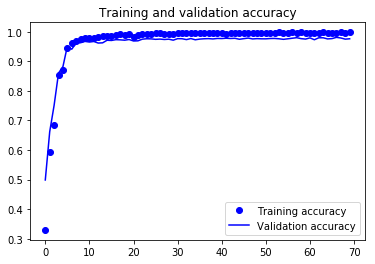

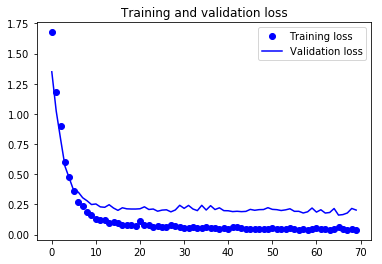

In [21]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# **Model Saving**

In [0]:
model.save("TunnedModel1.h5py")

# **Making prediction**

In [32]:
model.predict(test_data[:4])

array([[0.0000000e+00, 0.0000000e+00, 2.9635904e-23, 5.0951676e-06,
        1.2882010e-08, 9.0441992e-09, 5.6851572e-26, 9.9999487e-01,
        4.5052382e-29, 6.3005747e-09],
       [9.9617048e-37, 0.0000000e+00, 9.9999583e-01, 1.6176057e-19,
        4.1146473e-06, 4.1926475e-26, 2.2115425e-21, 5.1207191e-11,
        1.4731994e-36, 2.7128039e-13],
       [8.1688300e-32, 1.0000000e+00, 0.0000000e+00, 5.7519358e-19,
        0.0000000e+00, 1.3483778e-12, 0.0000000e+00, 9.2634020e-36,
        7.9793265e-09, 2.8948781e-37],
       [9.9999726e-01, 0.0000000e+00, 0.0000000e+00, 1.1700062e-10,
        8.2416973e-19, 1.6454504e-37, 0.0000000e+00, 1.4495878e-20,
        8.5658840e-13, 2.7437065e-06]], dtype=float32)

# **Checking Prediction result from test label**

In [35]:
#actual results for first 4 images in test set
test_label[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [74]:
predicted_classes = model.predict(test_data)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape,test_labels.shape

((10000,), (10000,))

# **Plotting charts of correct and incorret labels**

Found 9783 correct labels


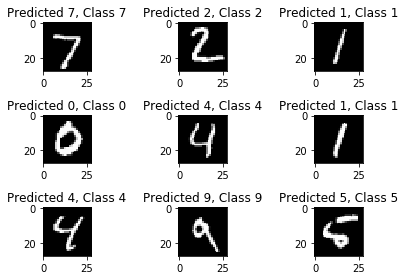

In [75]:
correct = np.where(predicted_classes==test_labels)[0]
print ("Found %d correct labels" %  len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_data[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_labels[correct]))
    plt.tight_layout()

Found 217 incorrect labels


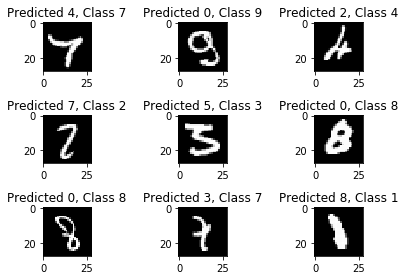

In [80]:
incorrect = np.where(predicted_classes!=test_labels)[0]
print ("Found %d incorrect labels" %  len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_data[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_labels[incorrect]))
    plt.tight_layout()

# **Report**

In [82]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(test_labels, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.95      0.99      0.97       980
     Class 1       0.99      0.99      0.99      1135
     Class 2       0.98      0.98      0.98      1032
     Class 3       0.96      0.98      0.97      1010
     Class 4       0.98      0.98      0.98       982
     Class 5       0.99      0.98      0.98       892
     Class 6       0.99      0.98      0.99       958
     Class 7       0.99      0.95      0.97      1028
     Class 8       0.98      0.97      0.98       974
     Class 9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

